In [11]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vgsales.csv')

In [13]:
import pandas as pd

# Membaca dataset dari Google Drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vgsales.csv')

# Melihat informasi awal dataset
df.info()

# Menghapus baris dengan nilai kosong pada kolom penting
df.dropna(subset=['Year', 'Publisher'], inplace=True)

# Menghapus duplikasi jika ada
df.drop_duplicates(inplace=True)

# Mengonversi kolom 'Year' ke tipe data integer
df['Year'] = df['Year'].astype(int)

# Memfilter data berdasarkan rentang tahun wajar
df = df[(df['Year'] >= 1980) & (df['Year'] <= 2020)]

# Menstandarkan format teks
df['Genre'] = df['Genre'].str.title().str.strip()
df['Publisher'] = df['Publisher'].str.strip()

# Mengecek hasil akhir
df.info()
print(f"Total data setelah cleansing: {len(df)}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  ob

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-3063981739.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='cool')


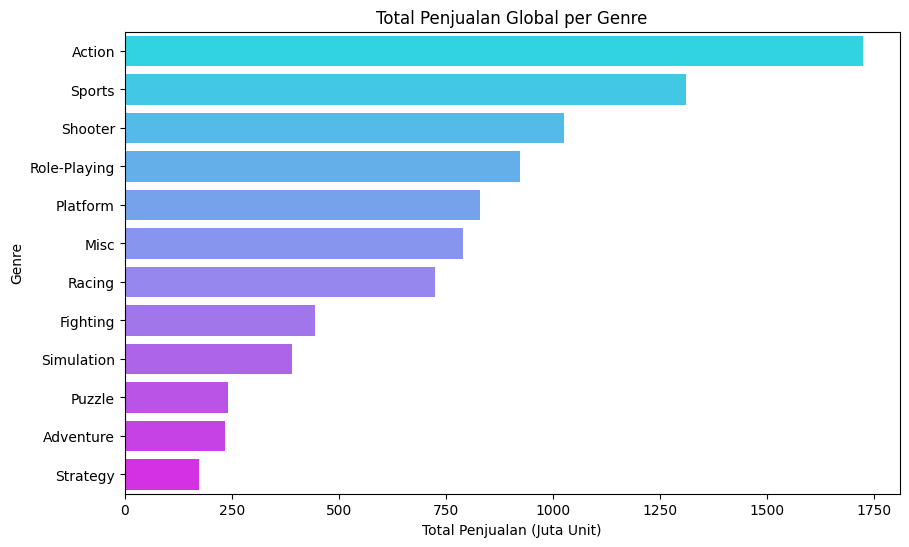

In [14]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vgsales.csv')


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df.dropna(subset=['Year', 'Publisher'])
df['Year'] = df['Year'].astype(int)
df = df.drop_duplicates(subset=['Name', 'Platform'])

genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='cool')
plt.title('Total Penjualan Global per Genre')
plt.xlabel('Total Penjualan (Juta Unit)')
plt.ylabel('Genre')
plt.show()


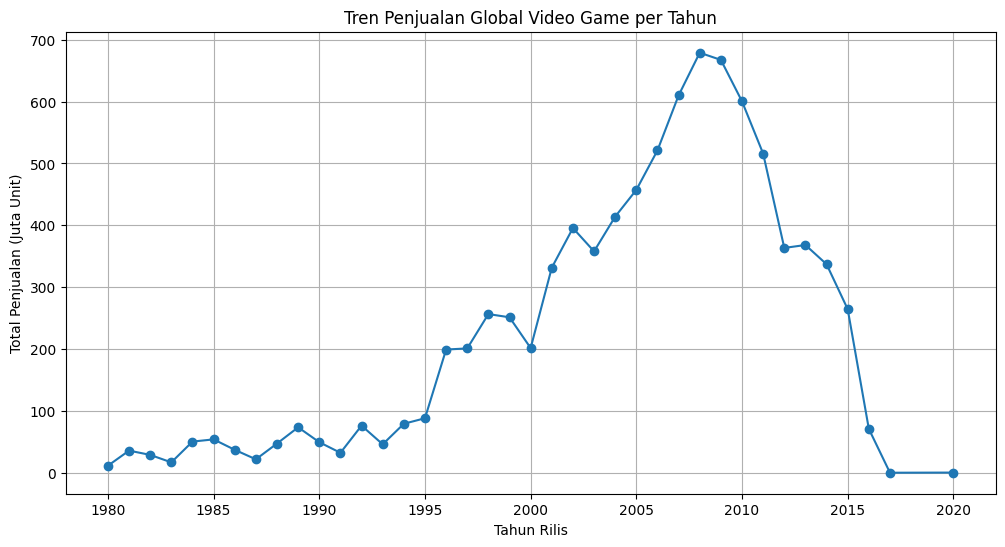

In [15]:
yearly_sales = df.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(12,6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o')
plt.title('Tren Penjualan Global Video Game per Tahun')
plt.xlabel('Tahun Rilis')
plt.ylabel('Total Penjualan (Juta Unit)')
plt.grid(True)
plt.show()


/tmp/ipython-input-1839932551.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='mako')


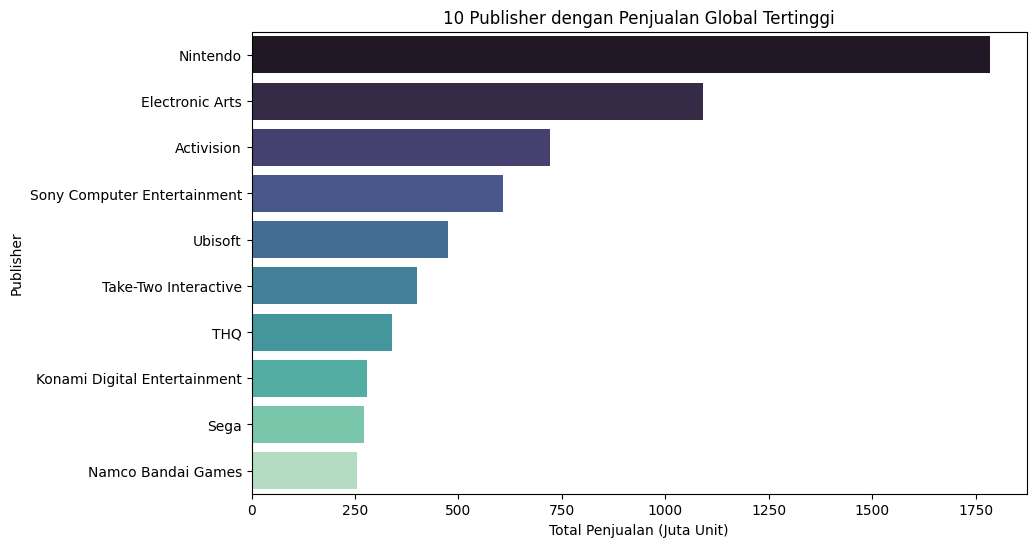

In [16]:
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='mako')
plt.title('10 Publisher dengan Penjualan Global Tertinggi')
plt.xlabel('Total Penjualan (Juta Unit)')
plt.ylabel('Publisher')
plt.show()


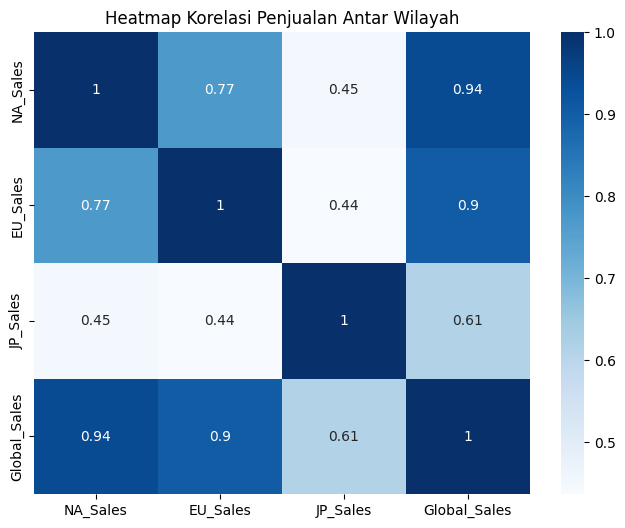

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['NA_Sales','EU_Sales','JP_Sales','Global_Sales']].corr(), annot=True, cmap='Blues')
plt.title('Heatmap Korelasi Penjualan Antar Wilayah')
plt.show()
